### Fashion MNIST
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The classes are (Label - Description):<br />
0 - T-shirt/top<br />
1 - Trouser<br />
2 - Pullover<br />
3 - Dress<br />
4 - Coat<br />
5 - Sandal<br />
6 - Shirt<br />
7 - Sneaker<br />
8 - Bag<br />
9 - Ankle boot<br />

Wersja z poprzedniego zadania domowego:

Epoch 1/40
235/235 - 4s - 19ms/step - accuracy: 0.3692 - loss: 1.7161 - val_accuracy: 0.6812 - val_loss: 0.8050
Epoch 2/40
235/235 - 3s - 12ms/step - accuracy: 0.7474 - loss: 0.6633 - val_accuracy: 0.7948 - val_loss: 0.5329
Epoch 3/40
235/235 - 5s - 22ms/step - accuracy: 0.8177 - loss: 0.5112 - val_accuracy: 0.8361 - val_loss: 0.4612
Epoch 4/40
235/235 - 3s - 12ms/step - accuracy: 0.8378 - loss: 0.4566 - val_accuracy: 0.8348 - val_loss: 0.4494
Epoch 5/40
235/235 - 3s - 13ms/step - accuracy: 0.8502 - loss: 0.4248 - val_accuracy: 0.8525 - val_loss: 0.4156
Epoch 6/40
235/235 - 3s - 12ms/step - accuracy: 0.8546 - loss: 0.4059 - val_accuracy: 0.8540 - val_loss: 0.4024
Epoch 7/40
235/235 - 3s - 13ms/step - accuracy: 0.8595 - loss: 0.3896 - val_accuracy: 0.8551 - val_loss: 0.3925
Epoch 8/40
235/235 - 3s - 13ms/step - accuracy: 0.8651 - loss: 0.3771 - val_accuracy: 0.8613 - val_loss: 0.3826
Epoch 9/40
235/235 - 7s - 28ms/step - accuracy: 0.8683 - loss: 0.3658 - val_accuracy: 0.8672 - val_loss:

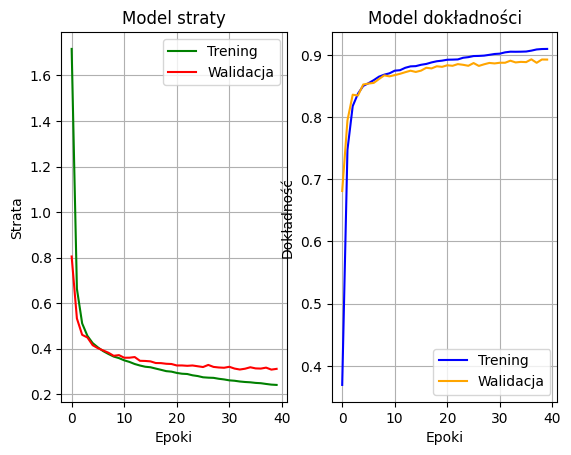

In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input

# Przygotowanie danych
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Konwersja i normalizacja danych
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Hiperparametry
num_classes = 10 # Number of classes
num_features = 784 # Number of input features (28*28)
num_layers=4
epochs = 40
learning_rate = 0.001
batch_size = 256
activation_hidden='sigmoid'
activation_exit='softmax'
dropout_rate = 0.3

def create_model(learning_rate=0.01, num_layers=2, activation_hidden='relu', activation_exit='softmax', dropout_rate=0.5):
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Flatten())
    for _ in range(num_layers-1):
        model.add(Dense(256, activation=activation_hidden))
        model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation=activation_exit))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    return model

# Tworzenie modelu z przykładowymi hiperparametrami regularyzacji
model = create_model(learning_rate=learning_rate, num_layers=num_layers, activation_hidden=activation_hidden, activation_exit=activation_exit, dropout_rate=dropout_rate)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Trenowanie modelu
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nDokładnośc testowa:', test_acc)


# Wykresy
print("Historia straty i dokładności:")
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='g')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title("Model straty")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend(["Trening", "Walidacja"], loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title("Model dokładności")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend(["Trening", "Walidacja"], loc='lower right')
plt.grid(True)

plt.show()

### Zad 1 - Wersja nr 1:

Epoch 1/40
235/235 - 7s - 32ms/step - accuracy: 0.7709 - loss: 0.7388 - val_accuracy: 0.8317 - val_loss: 0.4806
Epoch 2/40
235/235 - 7s - 31ms/step - accuracy: 0.8595 - loss: 0.4112 - val_accuracy: 0.8654 - val_loss: 0.3921
Epoch 3/40
235/235 - 7s - 31ms/step - accuracy: 0.8808 - loss: 0.3463 - val_accuracy: 0.8709 - val_loss: 0.3651
Epoch 4/40
235/235 - 7s - 32ms/step - accuracy: 0.8914 - loss: 0.3105 - val_accuracy: 0.8842 - val_loss: 0.3314
Epoch 5/40
235/235 - 7s - 32ms/step - accuracy: 0.9002 - loss: 0.2852 - val_accuracy: 0.8935 - val_loss: 0.3044
Epoch 6/40
235/235 - 7s - 31ms/step - accuracy: 0.9049 - loss: 0.2673 - val_accuracy: 0.8953 - val_loss: 0.2939
Epoch 7/40
235/235 - 7s - 31ms/step - accuracy: 0.9102 - loss: 0.2518 - val_accuracy: 0.8942 - val_loss: 0.2982
Epoch 8/40
235/235 - 7s - 32ms/step - accuracy: 0.9158 - loss: 0.2379 - val_accuracy: 0.8998 - val_loss: 0.2771
Epoch 9/40
235/235 - 7s - 31ms/step - accuracy: 0.9200 - loss: 0.2266 - val_accuracy: 0.9013 - val_loss:

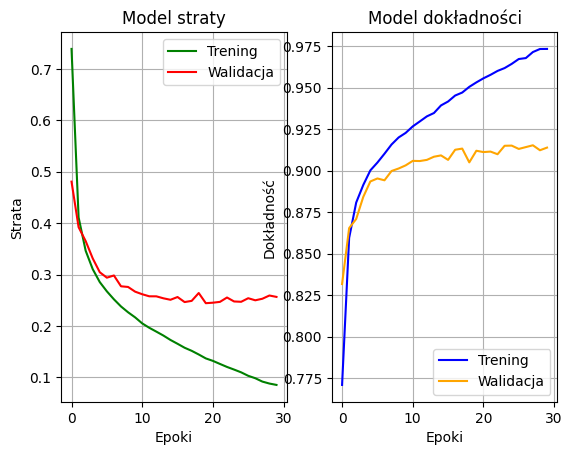

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import models

# Przygotowanie danych
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Konwersja i normalizacja danych
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Hiperparametry
num_classes = 10 # Number of classes
num_features = 784 # Number of input features (28*28)
epochs = 40
learning_rate = 0.001
batch_size = 256
activation_conv='relu'
activation_hidden='sigmoid'
activation_exit='softmax'
dropout_rate = 0.3

def create_model(learning_rate=0.01, activation_conv='relu', activation_hidden='relu', activation_exit='softmax', dropout_rate=0.5):
    model = models.Sequential([
        layers.Input((28,28,1)),
        layers.Conv2D(32, (3, 3), activation=activation_conv),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation=activation_hidden),
        layers.Dense(10, activation=activation_exit)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', 
        metrics=["accuracy"])

    return model

# Tworzenie modelu z przykładowymi hiperparametrami regularyzacji
model = create_model(learning_rate=learning_rate,activation_conv=activation_conv, activation_hidden=activation_hidden, activation_exit=activation_exit, dropout_rate=dropout_rate)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Trenowanie modelu
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nDokładnośc testowa:', test_acc)


# Wykresy
print("Historia straty i dokładności:")
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='g')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title("Model straty")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend(["Trening", "Walidacja"], loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title("Model dokładności")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend(["Trening", "Walidacja"], loc='lower right')
plt.grid(True)

plt.show()

### Zad 1 - Wersja nr 2:

Epoch 1/10
235/235 - 7s - 30ms/step - accuracy: 0.7635 - loss: 0.7500 - val_accuracy: 0.8155 - val_loss: 0.5185
Epoch 2/10
235/235 - 6s - 25ms/step - accuracy: 0.8517 - loss: 0.4316 - val_accuracy: 0.8578 - val_loss: 0.4157
Epoch 3/10
235/235 - 7s - 29ms/step - accuracy: 0.8737 - loss: 0.3639 - val_accuracy: 0.8736 - val_loss: 0.3683
Epoch 4/10
235/235 - 6s - 26ms/step - accuracy: 0.8871 - loss: 0.3258 - val_accuracy: 0.8837 - val_loss: 0.3394
Epoch 5/10
235/235 - 8s - 32ms/step - accuracy: 0.8963 - loss: 0.2990 - val_accuracy: 0.8875 - val_loss: 0.3199
Epoch 6/10
235/235 - 7s - 29ms/step - accuracy: 0.9015 - loss: 0.2794 - val_accuracy: 0.8902 - val_loss: 0.3074
Epoch 7/10
235/235 - 7s - 30ms/step - accuracy: 0.9057 - loss: 0.2663 - val_accuracy: 0.8906 - val_loss: 0.2968
Epoch 8/10
235/235 - 11s - 45ms/step - accuracy: 0.9111 - loss: 0.2510 - val_accuracy: 0.8961 - val_loss: 0.2867
Epoch 9/10
235/235 - 6s - 24ms/step - accuracy: 0.9155 - loss: 0.2386 - val_accuracy: 0.8994 - val_loss

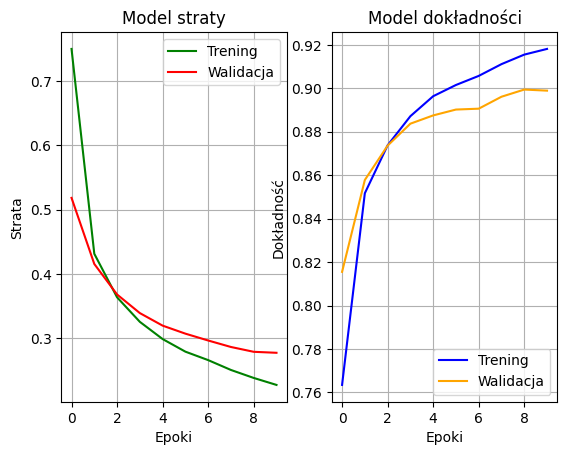

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import models

# Przygotowanie danych
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Konwersja i normalizacja danych
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Hiperparametry
num_classes = 10 # Number of classes
num_features = 784 # Number of input features (28*28)
epochs = 10
learning_rate = 0.001
batch_size = 256
activation_conv='relu'
activation_hidden='sigmoid'
activation_exit='softmax'
dropout_rate = 0.3

def create_model(learning_rate=0.01, activation_conv='relu', activation_hidden='relu', activation_exit='softmax', dropout_rate=0.5):
    model = models.Sequential([
        layers.Input((28,28,1)),
        layers.Conv2D(32, (3, 3), activation=activation_conv),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation=activation_hidden),
        layers.Dense(10, activation=activation_exit)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', 
        metrics=["accuracy"])

    return model

# Tworzenie modelu z przykładowymi hiperparametrami regularyzacji
model = create_model(learning_rate=learning_rate,activation_conv=activation_conv, activation_hidden=activation_hidden, activation_exit=activation_exit, dropout_rate=dropout_rate)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Trenowanie modelu
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nDokładnośc testowa:', test_acc)


# Wykresy
print("Historia straty i dokładności:")
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='g')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title("Model straty")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend(["Trening", "Walidacja"], loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title("Model dokładności")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend(["Trening", "Walidacja"], loc='lower right')
plt.grid(True)

plt.show()

### Zad 1 - Wersja nr 3:

Epoch 1/10
235/235 - 10s - 41ms/step - accuracy: 0.7960 - loss: 0.5736 - val_accuracy: 0.8456 - val_loss: 0.4271
Epoch 2/10
235/235 - 10s - 42ms/step - accuracy: 0.8703 - loss: 0.3668 - val_accuracy: 0.8743 - val_loss: 0.3658
Epoch 3/10
235/235 - 10s - 43ms/step - accuracy: 0.8867 - loss: 0.3154 - val_accuracy: 0.8814 - val_loss: 0.3288
Epoch 4/10
235/235 - 9s - 37ms/step - accuracy: 0.8964 - loss: 0.2892 - val_accuracy: 0.8937 - val_loss: 0.3024
Epoch 5/10
235/235 - 7s - 28ms/step - accuracy: 0.9042 - loss: 0.2659 - val_accuracy: 0.9014 - val_loss: 0.2798
Epoch 6/10
235/235 - 7s - 28ms/step - accuracy: 0.9110 - loss: 0.2472 - val_accuracy: 0.9011 - val_loss: 0.2736
Epoch 7/10
235/235 - 8s - 32ms/step - accuracy: 0.9168 - loss: 0.2281 - val_accuracy: 0.9081 - val_loss: 0.2580
Epoch 8/10
235/235 - 7s - 32ms/step - accuracy: 0.9209 - loss: 0.2152 - val_accuracy: 0.9037 - val_loss: 0.2660
Epoch 9/10
235/235 - 6s - 27ms/step - accuracy: 0.9264 - loss: 0.2032 - val_accuracy: 0.9109 - val_lo

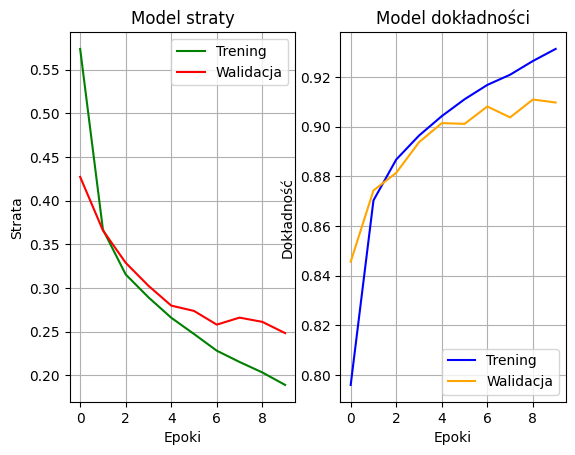

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import models

# Przygotowanie danych
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Konwersja i normalizacja danych
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Hiperparametry
num_classes = 10 # Number of classes
num_features = 784 # Number of input features (28*28)
epochs = 10
learning_rate = 0.001
batch_size = 256
activation_conv='relu'
activation_hidden='relu'
activation_exit='softmax'
dropout_rate = 0.3

def create_model(learning_rate=0.01, activation_conv='relu', activation_hidden='relu', activation_exit='softmax', dropout_rate=0.5):
    model = models.Sequential([
        layers.Input((28,28,1)),
        layers.Conv2D(32, (3, 3), activation=activation_conv),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation=activation_conv),
        layers.Flatten(),
        layers.Dense(64, activation=activation_hidden),
        layers.Dense(10, activation=activation_exit)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', 
        metrics=["accuracy"])

    return model

# Tworzenie modelu z przykładowymi hiperparametrami regularyzacji
model = create_model(learning_rate=learning_rate,activation_conv=activation_conv, activation_hidden=activation_hidden, activation_exit=activation_exit, dropout_rate=dropout_rate)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Trenowanie modelu
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nDokładnośc testowa:', test_acc)


# Wykresy
print("Historia straty i dokładności:")
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='g')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title("Model straty")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend(["Trening", "Walidacja"], loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title("Model dokładności")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend(["Trening", "Walidacja"], loc='lower right')
plt.grid(True)

plt.show()

### Zad 1 - Wersja nr 4:

Epoch 1/10
235/235 - 10s - 44ms/step - accuracy: 0.5665 - loss: 1.3949 - val_accuracy: 0.7389 - val_loss: 0.8362
Epoch 2/10
235/235 - 9s - 40ms/step - accuracy: 0.7783 - loss: 0.6508 - val_accuracy: 0.7991 - val_loss: 0.5662
Epoch 3/10
235/235 - 10s - 44ms/step - accuracy: 0.8246 - loss: 0.4859 - val_accuracy: 0.8348 - val_loss: 0.4533
Epoch 4/10
235/235 - 10s - 43ms/step - accuracy: 0.8554 - loss: 0.4068 - val_accuracy: 0.8568 - val_loss: 0.3997
Epoch 5/10
235/235 - 9s - 40ms/step - accuracy: 0.8723 - loss: 0.3551 - val_accuracy: 0.8769 - val_loss: 0.3523
Epoch 6/10
235/235 - 8s - 33ms/step - accuracy: 0.8829 - loss: 0.3219 - val_accuracy: 0.8815 - val_loss: 0.3312
Epoch 7/10
235/235 - 8s - 34ms/step - accuracy: 0.8933 - loss: 0.2962 - val_accuracy: 0.8807 - val_loss: 0.3376
Epoch 8/10
235/235 - 9s - 37ms/step - accuracy: 0.8988 - loss: 0.2792 - val_accuracy: 0.8829 - val_loss: 0.3229
Epoch 9/10
235/235 - 10s - 41ms/step - accuracy: 0.9039 - loss: 0.2657 - val_accuracy: 0.8956 - val_l

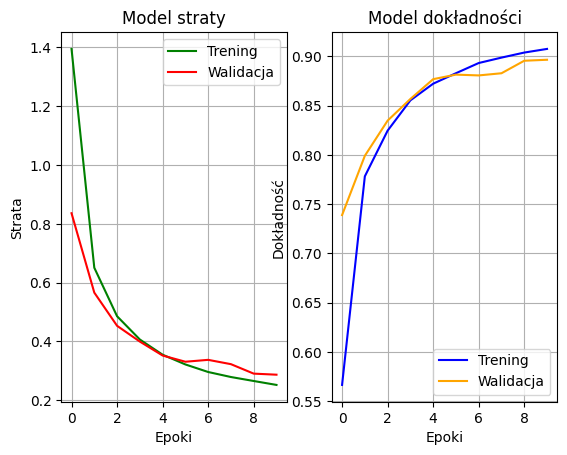

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import models

# Przygotowanie danych
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Konwersja i normalizacja danych
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Hiperparametry
num_classes = 10 # Number of classes
num_features = 784 # Number of input features (28*28)
epochs = 10
learning_rate = 0.001
batch_size = 256
activation_conv='relu'
activation_hidden='sigmoid'
activation_exit='softmax'
dropout_rate = 0.3

def create_model(learning_rate=0.01, activation_conv='relu', activation_hidden='relu', activation_exit='softmax', dropout_rate=0.5):
    model = models.Sequential([
        layers.Input((28,28,1)),
        layers.Conv2D(32, (3, 3), activation=activation_conv),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation=activation_conv),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_conv),
        layers.Flatten(),
        layers.Dense(64, activation=activation_hidden),
        layers.Dense(64, activation=activation_hidden),
        layers.Dense(10, activation=activation_exit)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', 
        metrics=["accuracy"])

    return model

# Tworzenie modelu z przykładowymi hiperparametrami regularyzacji
model = create_model(learning_rate=learning_rate,activation_conv=activation_conv, activation_hidden=activation_hidden, activation_exit=activation_exit, dropout_rate=dropout_rate)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Trenowanie modelu
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nDokładnośc testowa:', test_acc)


# Wykresy
print("Historia straty i dokładności:")
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='g')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title("Model straty")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend(["Trening", "Walidacja"], loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title("Model dokładności")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend(["Trening", "Walidacja"], loc='lower right')
plt.grid(True)

plt.show()

### Zad 1 - Wersja nr 5:

Epoch 1/10
235/235 - 15s - 64ms/step - accuracy: 0.7168 - loss: 0.7782 - val_accuracy: 0.7842 - val_loss: 0.5921
Epoch 2/10
235/235 - 14s - 61ms/step - accuracy: 0.8235 - loss: 0.4857 - val_accuracy: 0.8372 - val_loss: 0.4526
Epoch 3/10
235/235 - 12s - 52ms/step - accuracy: 0.8460 - loss: 0.4213 - val_accuracy: 0.8413 - val_loss: 0.4320
Epoch 4/10
235/235 - 13s - 54ms/step - accuracy: 0.8624 - loss: 0.3775 - val_accuracy: 0.8550 - val_loss: 0.4034
Epoch 5/10
235/235 - 15s - 63ms/step - accuracy: 0.8717 - loss: 0.3487 - val_accuracy: 0.8685 - val_loss: 0.3651
Epoch 6/10
235/235 - 14s - 61ms/step - accuracy: 0.8813 - loss: 0.3225 - val_accuracy: 0.8686 - val_loss: 0.3611
Epoch 7/10
235/235 - 15s - 64ms/step - accuracy: 0.8863 - loss: 0.3063 - val_accuracy: 0.8797 - val_loss: 0.3363
Epoch 8/10
235/235 - 14s - 60ms/step - accuracy: 0.8944 - loss: 0.2883 - val_accuracy: 0.8724 - val_loss: 0.3650
Epoch 9/10
235/235 - 15s - 62ms/step - accuracy: 0.8992 - loss: 0.2727 - val_accuracy: 0.8875 - 

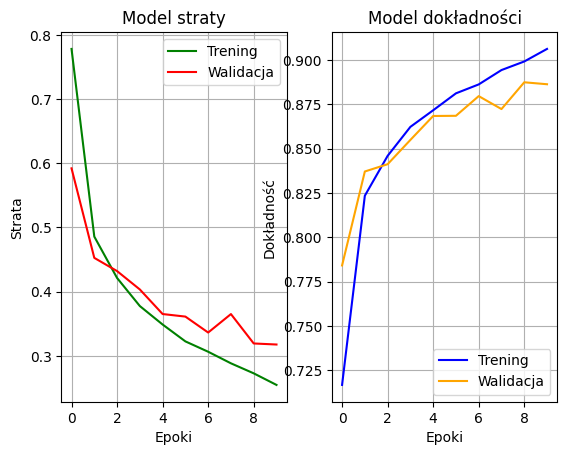

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import models

# Przygotowanie danych
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Konwersja i normalizacja danych
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Hiperparametry
num_classes = 10 # Number of classes
num_features = 784 # Number of input features (28*28)
epochs = 10
learning_rate = 0.001
batch_size = 256
activation_conv='relu'
activation_hidden='relu'
activation_exit='softmax'
dropout_rate = 0.3

def create_model(learning_rate=0.01, activation_conv='relu', activation_hidden='relu', activation_exit='softmax', dropout_rate=0.5):
    model = models.Sequential([
        layers.Input((28,28,1)),
        layers.Conv2D(32, (3, 3), activation=activation_conv),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_conv),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation=activation_conv),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation=activation_hidden),
        layers.Dense(10, activation=activation_exit)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', 
        metrics=["accuracy"])

    return model

# Tworzenie modelu z przykładowymi hiperparametrami regularyzacji
model = create_model(learning_rate=learning_rate,activation_conv=activation_conv, activation_hidden=activation_hidden, activation_exit=activation_exit, dropout_rate=dropout_rate)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Trenowanie modelu
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nDokładnośc testowa:', test_acc)


# Wykresy
print("Historia straty i dokładności:")
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='g')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title("Model straty")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend(["Trening", "Walidacja"], loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title("Model dokładności")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend(["Trening", "Walidacja"], loc='lower right')
plt.grid(True)

plt.show()

### Zad 1 - Wersja nr 6:

Epoch 1/10
235/235 - 14s - 61ms/step - accuracy: 0.7010 - loss: 0.8120 - val_accuracy: 0.8081 - val_loss: 0.5401
Epoch 2/10
235/235 - 10s - 44ms/step - accuracy: 0.8219 - loss: 0.4899 - val_accuracy: 0.8350 - val_loss: 0.4466
Epoch 3/10
235/235 - 13s - 53ms/step - accuracy: 0.8453 - loss: 0.4227 - val_accuracy: 0.8563 - val_loss: 0.3942
Epoch 4/10
235/235 - 10s - 44ms/step - accuracy: 0.8622 - loss: 0.3754 - val_accuracy: 0.8628 - val_loss: 0.3747
Epoch 5/10
235/235 - 11s - 48ms/step - accuracy: 0.8714 - loss: 0.3536 - val_accuracy: 0.8655 - val_loss: 0.3616
Epoch 6/10
235/235 - 10s - 45ms/step - accuracy: 0.8772 - loss: 0.3327 - val_accuracy: 0.8606 - val_loss: 0.3725
Epoch 7/10
235/235 - 11s - 48ms/step - accuracy: 0.8850 - loss: 0.3115 - val_accuracy: 0.8819 - val_loss: 0.3286
Epoch 8/10
235/235 - 11s - 46ms/step - accuracy: 0.8914 - loss: 0.2947 - val_accuracy: 0.8795 - val_loss: 0.3281
Epoch 9/10
235/235 - 12s - 49ms/step - accuracy: 0.8965 - loss: 0.2798 - val_accuracy: 0.8722 - 

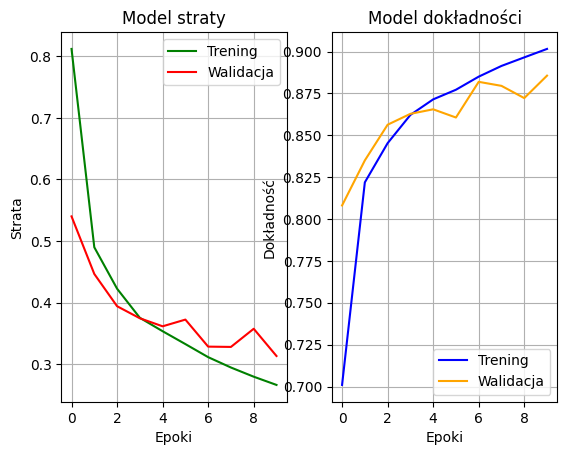

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import models

# Przygotowanie danych
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Konwersja i normalizacja danych
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

# Hiperparametry
num_classes = 10 # Number of classes
num_features = 784 # Number of input features (28*28)
epochs = 10
learning_rate = 0.001
batch_size = 256
activation_conv='relu'
activation_hidden='relu'
activation_exit='softmax'
dropout_rate = 0.3

def create_model(learning_rate=0.01, activation_conv='relu', activation_hidden='relu', activation_exit='softmax', dropout_rate=0.5):
    model = models.Sequential([
        layers.Input((28,28,1)),
        layers.Conv2D(32, (3, 3), activation=activation_conv),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_conv),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation=activation_conv),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation=activation_hidden),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation=activation_exit)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', 
        metrics=["accuracy"])

    return model

# Tworzenie modelu z przykładowymi hiperparametrami regularyzacji
model = create_model(learning_rate=learning_rate,activation_conv=activation_conv, activation_hidden=activation_hidden, activation_exit=activation_exit, dropout_rate=dropout_rate)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Trenowanie modelu
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nDokładnośc testowa:', test_acc)


# Wykresy
print("Historia straty i dokładności:")
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='g')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title("Model straty")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend(["Trening", "Walidacja"], loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title("Model dokładności")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend(["Trening", "Walidacja"], loc='lower right')
plt.grid(True)

plt.show()

### Zad 2 - Wersja nr 1:

Epoch 1/20
235/235 - 271s - 1s/step - accuracy: 0.6797 - loss: 0.9800 - val_accuracy: 0.7928 - val_loss: 0.6030
Epoch 2/20
235/235 - 181s - 770ms/step - accuracy: 0.7980 - loss: 0.5930 - val_accuracy: 0.8165 - val_loss: 0.5084
Epoch 3/20
235/235 - 222s - 945ms/step - accuracy: 0.8189 - loss: 0.5202 - val_accuracy: 0.8289 - val_loss: 0.4773
Epoch 4/20
235/235 - 200s - 850ms/step - accuracy: 0.8299 - loss: 0.4832 - val_accuracy: 0.8372 - val_loss: 0.4556
Epoch 5/20
235/235 - 184s - 781ms/step - accuracy: 0.8367 - loss: 0.4614 - val_accuracy: 0.8403 - val_loss: 0.4409
Epoch 6/20
235/235 - 187s - 795ms/step - accuracy: 0.8425 - loss: 0.4418 - val_accuracy: 0.8439 - val_loss: 0.4313
Epoch 7/20
235/235 - 186s - 790ms/step - accuracy: 0.8467 - loss: 0.4305 - val_accuracy: 0.8485 - val_loss: 0.4257
Epoch 8/20
235/235 - 197s - 837ms/step - accuracy: 0.8507 - loss: 0.4179 - val_accuracy: 0.8501 - val_loss: 0.4242
Epoch 9/20
235/235 - 198s - 842ms/step - accuracy: 0.8537 - loss: 0.4113 - val_accu

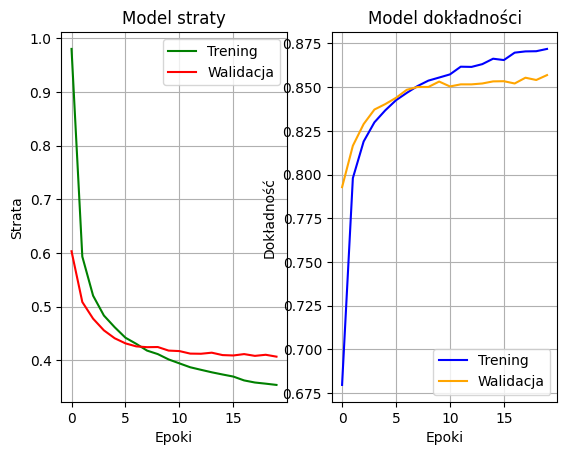

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import models
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# Przygotowanie danych
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Konwersja i normalizacja danych
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Przeskalowanie do 32x32
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

# Konwersja do 3 kanałów
x_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train))
x_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))

# Normalizacja
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# Hiperparametry
num_classes = 10
epochs = 20
learning_rate = 0.001
batch_size = 256
activation_hidden='sigmoid'
activation_exit='softmax'
dropout_rate = 0.3

def create_model(learning_rate=0.01, activation_hidden='relu', activation_exit='softmax', dropout_rate=0.5):
    vgg_base = VGG16(include_top=False, input_shape=(32, 32, 3))
    vgg_base.trainable = False

    model = models.Sequential([
        vgg_base,
        layers.Flatten(),
        layers.Dense(64, activation=activation_hidden),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation=activation_exit)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', 
        metrics=["accuracy"])

    return model

# Tworzenie modelu z przykładowymi hiperparametrami regularyzacji
model = create_model(learning_rate=learning_rate, activation_hidden=activation_hidden, activation_exit=activation_exit, dropout_rate=dropout_rate)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Trenowanie modelu
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nDokładnośc testowa:', test_acc)


# Wykresy
print("Historia straty i dokładności:")
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='g')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title("Model straty")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend(["Trening", "Walidacja"], loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title("Model dokładności")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend(["Trening", "Walidacja"], loc='lower right')
plt.grid(True)

plt.show()

Zad 2 - Wersja z Feature Extraction i Fine-Tuning - wersja 1:

Epoch 1/5
235/235 - 171s - 727ms/step - accuracy: 0.6876 - loss: 0.9719 - val_accuracy: 0.7985 - val_loss: 0.5943
Epoch 2/5
235/235 - 184s - 781ms/step - accuracy: 0.7994 - loss: 0.5922 - val_accuracy: 0.8216 - val_loss: 0.5063
Epoch 3/5
235/235 - 175s - 747ms/step - accuracy: 0.8208 - loss: 0.5186 - val_accuracy: 0.8324 - val_loss: 0.4720
Epoch 4/5
235/235 - 177s - 753ms/step - accuracy: 0.8300 - loss: 0.4840 - val_accuracy: 0.8399 - val_loss: 0.4514
Epoch 5/5
235/235 - 174s - 741ms/step - accuracy: 0.8370 - loss: 0.4606 - val_accuracy: 0.8433 - val_loss: 0.4401
Epoch 1/10
235/235 - 293s - 1s/step - accuracy: 0.8358 - loss: 0.4582 - val_accuracy: 0.8581 - val_loss: 0.3891
Epoch 2/10
235/235 - 292s - 1s/step - accuracy: 0.8715 - loss: 0.3714 - val_accuracy: 0.8732 - val_loss: 0.3505
Epoch 3/10
235/235 - 293s - 1s/step - accuracy: 0.8871 - loss: 0.3277 - val_accuracy: 0.8856 - val_loss: 0.3284
Epoch 4/10
235/235 - 293s - 1s/step - accuracy: 0.8947 - loss: 0.3095 - val_accuracy: 0.8945 -

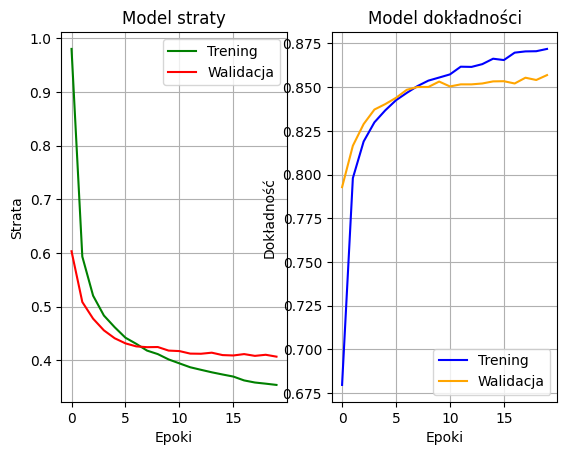

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import models
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# Przygotowanie danych
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Konwersja i normalizacja danych
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Przeskalowanie do 32x32
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

# Konwersja do 3 kanałów
x_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train))
x_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))

# Normalizacja
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# Hiperparametry
num_classes = 10
epochs_feature_extraction = 5
epochs_fine_tuning = 10
learning_rate = 0.001
batch_size = 256
activation_hidden='sigmoid'
activation_exit='softmax'
dropout_rate = 0.3

def create_model(learning_rate=0.01, activation_hidden='relu', activation_exit='softmax', dropout_rate=0.5):
    vgg_base = VGG16(include_top=False, input_shape=(32, 32, 3))
    vgg_base.trainable = False

    model = models.Sequential([
        vgg_base,
        layers.Flatten(),
        layers.Dense(64, activation=activation_hidden),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation=activation_exit)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', 
        metrics=["accuracy"])

    return model

# Tworzenie modelu z przykładowymi hiperparametrami regularyzacji
model = create_model(learning_rate=learning_rate, activation_hidden=activation_hidden, activation_exit=activation_exit, dropout_rate=dropout_rate)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Trenowanie modelu (Feature Extraction)
history_feature_extraction = model.fit(
    x_train, y_train,
    epochs=epochs_feature_extraction,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Odblokowanie wyższych warstw VGG16 (Fine-Tuning)
for layer in model.layers[0].layers[-4:]:
    layer.trainable = True

# Kompilacja modelu z niższym learning rate dla fine-tuningu
model.compile(
    optimizer=Adam(learning_rate=learning_rate / 10),
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

# Trenowanie modelu (Fine-Tuning)
history_fine_tuning = model.fit(
    x_train, y_train,
    epochs=epochs_fine_tuning,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nDokładnośc testowa:', test_acc)


# Wykresy
print("Historia straty i dokładności:")
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='g')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title("Model straty")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend(["Trening", "Walidacja"], loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title("Model dokładności")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend(["Trening", "Walidacja"], loc='lower right')
plt.grid(True)

plt.show()

Zad 2 - Wersja z Feature Extraction i Fine-Tuning - wersja 2:

Epoch 1/5
235/235 - 176s - 747ms/step - accuracy: 0.6963 - loss: 0.9523 - val_accuracy: 0.8018 - val_loss: 0.5946
Epoch 2/5
235/235 - 188s - 800ms/step - accuracy: 0.7995 - loss: 0.5885 - val_accuracy: 0.8237 - val_loss: 0.5060
Epoch 3/5
235/235 - 177s - 754ms/step - accuracy: 0.8201 - loss: 0.5204 - val_accuracy: 0.8338 - val_loss: 0.4703
Epoch 4/5
235/235 - 177s - 754ms/step - accuracy: 0.8299 - loss: 0.4823 - val_accuracy: 0.8418 - val_loss: 0.4490
Epoch 5/5
235/235 - 176s - 751ms/step - accuracy: 0.8372 - loss: 0.4600 - val_accuracy: 0.8429 - val_loss: 0.4373
Epoch 1/15
235/235 - 305s - 1s/step - accuracy: 0.8392 - loss: 0.4525 - val_accuracy: 0.8688 - val_loss: 0.3715
Epoch 2/15
235/235 - 303s - 1s/step - accuracy: 0.8701 - loss: 0.3710 - val_accuracy: 0.8820 - val_loss: 0.3371
Epoch 3/15
235/235 - 295s - 1s/step - accuracy: 0.8878 - loss: 0.3273 - val_accuracy: 0.8897 - val_loss: 0.3101
Epoch 4/15
235/235 - 297s - 1s/step - accuracy: 0.8953 - loss: 0.3030 - val_accuracy: 0.8917 -

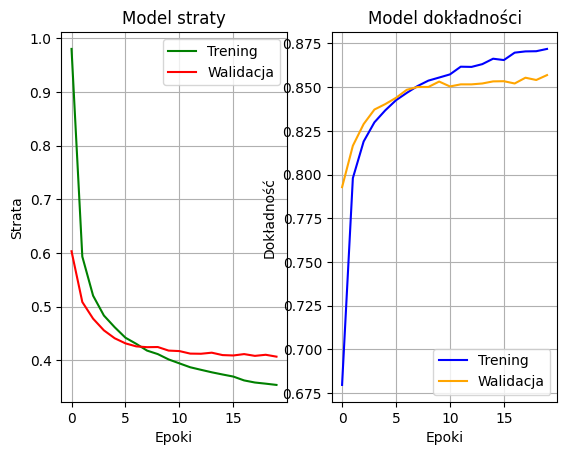

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import models
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# Przygotowanie danych
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Konwersja i normalizacja danych
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Przeskalowanie do 32x32
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

# Konwersja do 3 kanałów
x_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train))
x_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))

# Normalizacja
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# Hiperparametry
num_classes = 10
epochs_feature_extraction = 5
epochs_fine_tuning = 15
learning_rate = 0.001
batch_size = 256
activation_hidden='sigmoid'
activation_exit='softmax'
dropout_rate = 0.3

def create_model(learning_rate=0.01, activation_hidden='relu', activation_exit='softmax', dropout_rate=0.5):
    vgg_base = VGG16(include_top=False, input_shape=(32, 32, 3))
    vgg_base.trainable = False

    model = models.Sequential([
        vgg_base,
        layers.Flatten(),
        layers.Dense(64, activation=activation_hidden),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation=activation_exit)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', 
        metrics=["accuracy"])

    return model

# Tworzenie modelu z przykładowymi hiperparametrami regularyzacji
model = create_model(learning_rate=learning_rate, activation_hidden=activation_hidden, activation_exit=activation_exit, dropout_rate=dropout_rate)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Trenowanie modelu (Feature Extraction)
history_feature_extraction = model.fit(
    x_train, y_train,
    epochs=epochs_feature_extraction,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Odblokowanie wyższych warstw VGG16 (Fine-Tuning)
for layer in model.layers[0].layers[-4:]:
    layer.trainable = True

# Kompilacja modelu z niższym learning rate dla fine-tuningu
model.compile(
    optimizer=Adam(learning_rate=learning_rate / 10),
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

# Trenowanie modelu (Fine-Tuning)
history_fine_tuning = model.fit(
    x_train, y_train,
    epochs=epochs_fine_tuning,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2,
    callbacks=[early_stopping]
)

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nDokładnośc testowa:', test_acc)


# Wykresy
print("Historia straty i dokładności:")
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='g')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title("Model straty")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend(["Trening", "Walidacja"], loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title("Model dokładności")
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend(["Trening", "Walidacja"], loc='lower right')
plt.grid(True)

plt.show()

Wnioski:
- dodanie fine tuningu
- wyizolowanie cech

powoduje uzyskanie lepszej dokładności modelu.